# Computer Science and Data Analytic's
# Fundamentals of Data Analysis 
# Project 2020
## By: Keith Brazill - G00387845

*This assignement is submitted as part of the requirements for partial fullfilment of a postgraduate diploma in Computer Science with Data Analytics at Galway Mayo Institute of Technology.*

![alt text.](https://learnonline.gmit.ie/pluginfile.php/1/theme_adaptable/logo/1606983803/Transparent%20new.png "GMIT Logo")

<br>

# 1. Introduction

This notebook is prepared in response to the brief assigned for the project 2020 in the module of Fundamentals of Data Analysis 2020 as part of the postgraduate diploma in Computer Science with Data Analytics at Galway Mayo Institute of Technology.

This notebook is structured as follow's:

1. Introduction
2. The Project Brief
3. The Project Dataset  
4. Simple Linear Regression Model
5. Simple Regression Model Analysis
6. Polynomial Regression
7. Conclusion
8. References

To approach to this project will be firstly to examine the provided dataset via some simple statistical tables and graphs and then carry out simple linear regression on this dataset. Following application of the simple linear regression we will explain, analyse and determine accuracy of our regression. Finally we will review other forms of regression and compare these to our simple linear regression.

Throughout the notebook each of the above sections is cleary explained using a combination of code and markdown cells.

**Packages used in this Project**

The following python packages were used in this assignment to carry out the required the project brief:

* Python https://www.python.org/downloads/
* NumPy http://www.numpy.org/ - The fundamental package for scientific computing with Python.
* Jupyter Notebook https://jupyter.org/ - Project Jupyter exists to develop open-source software, open-standards, and services for interactive computing across dozens of programming languages.
* matplotlib.pyplot https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html - matplotlib.pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting. pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation.
* seaborn https://seaborn.pydata.org/ - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
* pandas https://pandas.pydata.org/ - pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language
* scikit-learn https://scikit-learn.org/stable/ Simple and efficient tools for predictive data analysis, built on NumPy, SciPy, and matplotlib


<br>

# 2. The Project Brief

*In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.*

*Your submission must be in the form of a git repository containing, at a minimum, the
following items:*

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

*To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.*

<br>

# 3. The Project Dataset

Before we begin with our regression modelling, it would be good practice to first have a look at our provided dataset and try and understand some of the patterns in the dataset. Let's first begin by reading the provided csv file with pandas below.

In [1]:
import pandas as pd # We import pandas so we can read our csv files.
import matplotlib.pyplot as plt # used for creatin plots
%matplotlib inline  
# Makes matplotlib show interactive plots in the notebook.

powerproduction = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv', sep=',')
# define powerproduction = pandas read csv file with comma seperated delimiter
powerproduction # print out to screen

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [2]:
powerproduction.describe() # prints out a summary of key statistics of dataset

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


We can see from our 2 tables above that there are 500 measurements for speed (wind speed km/h) and power in kilo watt hours (Output Energy, assumed to be kWh) corresponding to the wind speed. The mean wind speed is 12.5 km/h and the mean power is 48 kWh. Our minimum wind speed is 0  and max is 25. Our minimum power is 0 and maximum is 113. We have a standard deviation of ~7.22 on wind speed and ~41.61 on our power, therefore we expect some fluctuation from mean on wind speed and a high degree of fluctuation on the power output from the mean values. 

Wind power is generated by the force wind exerts on the blades of a turbine, causing the turbine's shaft to rotate at a speed of 10 to 20 revolutions per minute (rpm). The rotor shaft is connected to a generator that converts mechanical energy into electrical energy.

Following research online at;
* http://www.hydroquebec.com/learning/eolienne/#:~:text=Wind%20turbines%20require%3A,be%20stopped%20to%20avoid%20damagethe 

We found out the energy produced from a wind turbine is primarily affected by wind speed. Also, the minimum wind speed required for a wind turbine to start turning and generating electricity is 12-14 km/h. It was also noted that at high wind speeds the wind turbine can shut off to prevent damage to the turbine.

Following production of our tables above and some research, lets now visualise our data set in a scatter plot using code below.

Text(0.5, 1.0, 'Wind Energy')

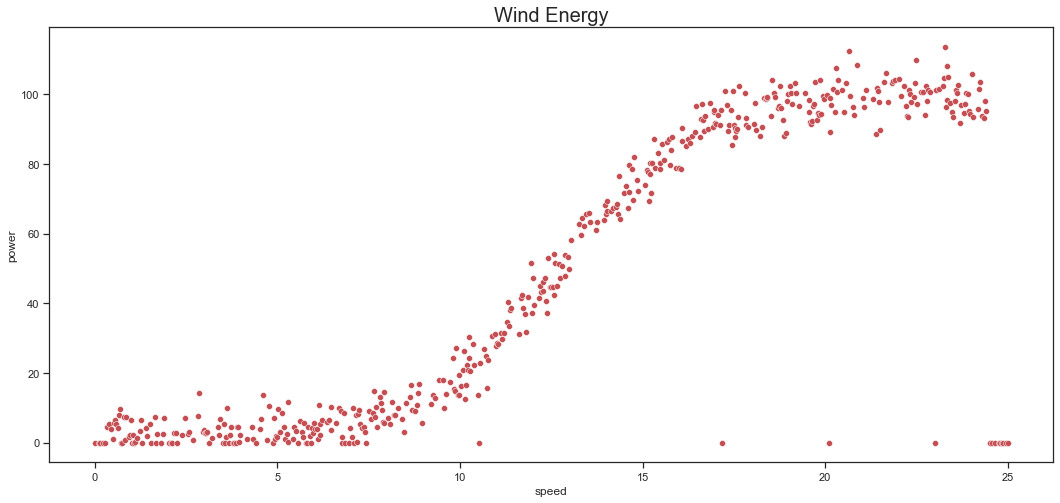

In [3]:
import matplotlib.pyplot as plt # imports matplotlib.pyplot as plt
import seaborn as sns # imports seaborn as sns
plt.rcParams["figure.figsize"] = (18,8) #sets the plots size
sns.set_theme(style="ticks") # user preferred style for sns plots

WindEnergy = sns.scatterplot(x="speed", y="power", data=powerproduction[0:], color='r')
# Creates a scatterplot with x, y and data inputs from row 0, color red. 
plt.title('Wind Energy', fontsize=20) # plots title with user defined fontsize

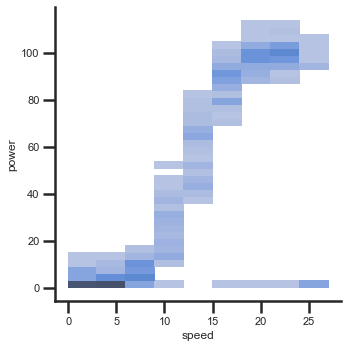

In [4]:
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
# changes the size of the text using the font_scale parameter for sns.set_context()
# to also change the line width so it matches. We do this with the rc parameter

WindEnergyDisplot = sns.displot(powerproduction, x="speed", y="power", binwidth=3)
# Creates a displot using seaborn with data, x, y inputs and binwidth set to 3 to group figures
WindEnergyDisplot # prints to screen

We can see from out output scatter and displot that the power output is generally low until it reaches around 12km/h (or close to mean wind speed) and then it keeps rising until it hits maximum output at about 90kWh within the wind speeds range from ~17km/h to ~25km/h. It is also noted that at the maximum wind speed there are a number of 0 measurements for power, this seems to relate to our research and that the wind turbine has cut out for safety reasons. There are also a number of outliers on the lower end of the scale, this may relate to other technical reasons the turbine may have cut out or perhaps due to changes in wind direction. 

Having imported and briefly analysed our dataset, we are now ready to move onto our next task and apply simple linear regression to the dataset.

<br>

# 4. Simple Linear Regression

**What is Simple Linear Regression**

Simple linear regression is a method of modelling a relationshop between two variables by fitting a straight line (linear equation) to the measured data. One variable is considered to be an explanatory variable (in our case power output) and the other is considered to be a dependent variable (the wind speed). 

Linear regression informs us the value of one variable based on the input of another, i.e. power output at given wind speed. In the field of data analysis, for machine learning it is one of the most simplest models to try out on a data set. If it is foreseen that there is likely a straight line trend in the data, simple linear regression can provide efficient and reasonably accurate results. 

Before we carry out simple linear regression on our dataset, it is important to understand that not all datasets follow a linear trend. Going back to our power dataset and research in wind energy engineering, we know at a certain output the wind turbine may power off and therefore the dataset may become exponential at this range. This will be explored further in section 6 of this notebook.

***

**Our Variables for Linear Regression**

Our first task in setting up our plot will be to set up the x and y axis data. We do this by creating variable s (x-axis) which is the wind speed and p (y-axis) which is power output. 

In [5]:
# Set's up our data for plot
s = powerproduction['speed'] # s variable takes speed column from powerproduction dictionary
p = powerproduction ['power'] # p variable takes power column from powerproduction dictionary
s, p # prints both variables to screen below

(0       0.000
 1       0.125
 2       0.150
 3       0.225
 4       0.275
         ...  
 495    24.775
 496    24.850
 497    24.875
 498    24.950
 499    25.000
 Name: speed, Length: 500, dtype: float64,
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 495    0.0
 496    0.0
 497    0.0
 498    0.0
 499    0.0
 Name: power, Length: 500, dtype: float64)

**Relationship between our x and y axis and Simple Linear Regression**

Now that we know our existing points, we want to determine the relationship between our x-axis and y-axis, our in simpler terms the value for y for each value for x. We want to determine the variables for m and c (coefficients) which can be used in the following formula for the equation of a straight line (line of best fit):

* $ y = mx + c $  
(source: https://www.mathcentre.ac.uk/resources/uploaded/mc-ty-strtlines-2009-1.pdf)

where;
* $m$ = gradient 
* $c$ = intercept of line point on y-axis

A line of best fit could be determined approximately by eyeball method (freehand). Depending on the dataset and personal view, there may be a number of different variants to this method, the authors example is shown in sketch below.

![alt text.](Lineofbestfit_authorattempt.jpg "FreehandLinearRegression")
*Freehand Sketch using Paint for Eyeball Method Linear Regression, source: Created by Author*

A much more accurate method of finding the best fit line is the **least square method.** For sets of ordered pairs i.e. $(x1,y1), (x2,y2),...(xn, yn)$, using the following steps the equation of a best fit line can be achieved:

* Step 1: Calculate the mean x and y values, $ \bar{x}, \bar{y} $

* Step 2: Calculate the $m$ value;
<br>
$ m = \frac{\sum_i (x - \bar{x}) * (y - \bar{y})}{\sum_i (x-\bar{x})^{2}} $
<br>
<br>
* Step 3: Calculate y intercept c value; 
<br>
$ c = \bar{y} - m * \bar{x}$
<br> 
<br> 
* Step 4: Use the calculated m and c values in our formula for equation of line and plot the points;
<br> 
$ y = mx + c $
<br> 

Please note that in our dataset $x$ is called $s$ (for wind speed) and $y$ is called $p$ (for power). We calculate $m$ and $c$ figures below based on above where x and y are replaced by s and p.

In [6]:
# Calculate the best values for m and c using least square method
import numpy as np # we import numpy to carry out some math functions below

# Step 1: Calculate the mean s and p values
s_avg = np.mean(s) # s and p means calculated using numpy (np.mean) function
p_avg = np.mean(p)

# Step 2: Calculate the m value
s_zero = s - s_avg # s - s mean
p_zero = p - p_avg # p - p mean

# After getting above values we apply formula for m slope from above 𝑚=∑(𝑥−𝑥¯)∗(𝑦−𝑦¯)/∑(𝑥−𝑥¯)2
m = np.sum(s_zero * p_zero) / np.sum(s_zero * s_zero)
# np.sum numpy function used to get sums

# Step 3: Calculate y intercept c value using formula 𝑐=𝑦¯−𝑚∗𝑥¯
c = p_avg - m * s_avg

print("m is %8.6f and c is %6.6f." % (m, c)) 
# we print output to screen using %8.6f and %6.6f to control number of decimals.

m is 4.917596 and c is -13.899903.


From our output above we can see our $m$ coefficient is 4.917596 and $c$ is -13.899903. Now that we have calculated m and c figures we can input both to our formula $y = mx + c$ and then plot the best fit line on our original scatter plot.

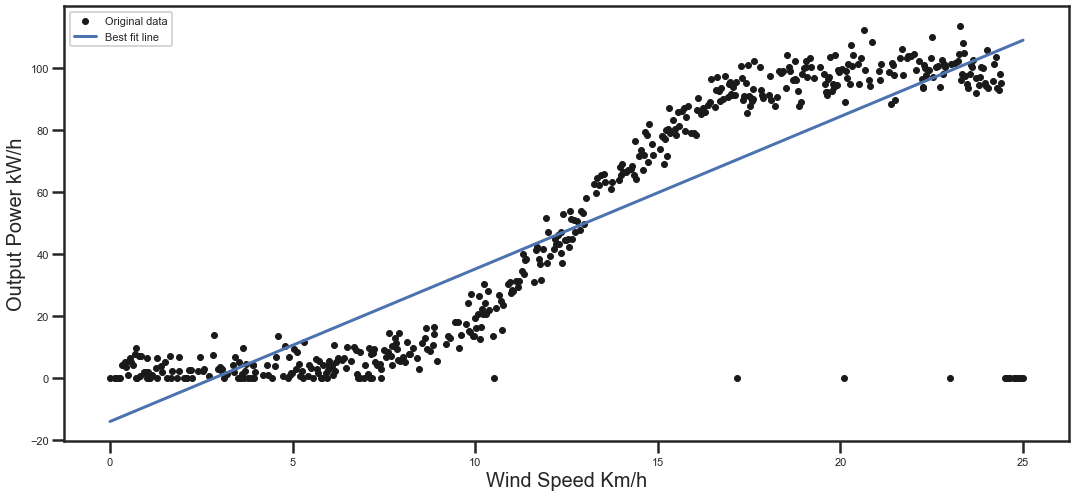

In [7]:
# Step 4: Use the calculated m and c values in our formula for equation of line  𝑦=𝑚𝑥+𝑐  and plot the points.
plt.plot(s, p, 'k.', label='Original data') 
# plots original points for speed and power in color black with dot marker and label.
plt.plot(s, m * s + c, 'b-', label='Best fit line') 
# plots new line using  data=s and formula y = mx + c, marker '-' indicates straight line in color blue with label.

# Add axis labels and a legend.
plt.xlabel('Wind Speed Km/h', fontsize=20) # Adds x axis label and adjusts fontsize
plt.ylabel('Output Power kW/h', fontsize=20) # Adds y axis label and adjusts fontsize
plt.legend() # adds legend using labels above

# Show the plot.
plt.show() # prints plot to screen using matplotlib.pyplot

We can see the best fit line using the least square method is steeper than our eyeball method and we are more confident of the accuracy given this mathematical approach. This completes our simple linear regression model for this data set. In section 5 of this notebook we will carry out analysis on our simple linear regression model, however before moving on it would be prudent to point out some more efficient methods of applying linear regression. As professionals we are always looking for ways to increase our efficiency, and whilst the steps carried out above are important to demonstrate our understanding of simple linear regression, there are build in fuctions available in python packages that speed up the process.

**Other Methods for Simple Linear Regression**

Firstly the coefficients for $m$ and $c$ can be easily calculated using numpy polyfit function. Numpy Polyfit applies the least squares model to the inputs for x and y and position.

In [8]:
# Numpy Polyfit to Calculate Coeffs 
np.polyfit(s, p, 1) # applies numpy polyfit to generate m and c coeffs based on inputs for x, y at position 1. 

array([  4.91759567, -13.89990263])

We can see from one line of code we get the exact same output as our previous calculation (𝑚  coefficient is 4.917596 and  𝑐  is -13.899903) but this is achieved much faster with a single line of code.

However, the process can be simplified further using a build in function in the seaborn library **lmplot**. By importing seaborn as sns, the function **sns.lmplot()** will fit a regression line to the data set using the least square method, this automatically calculates the values for $m$ and $c$ as part of the algorithim. The original points of the data set are shown as a scatterplot and the best fit line is shown on the grid. The entire regression model in this instance is achieved using only 3 lines of code and as per the output below, output is the same as our original method. 

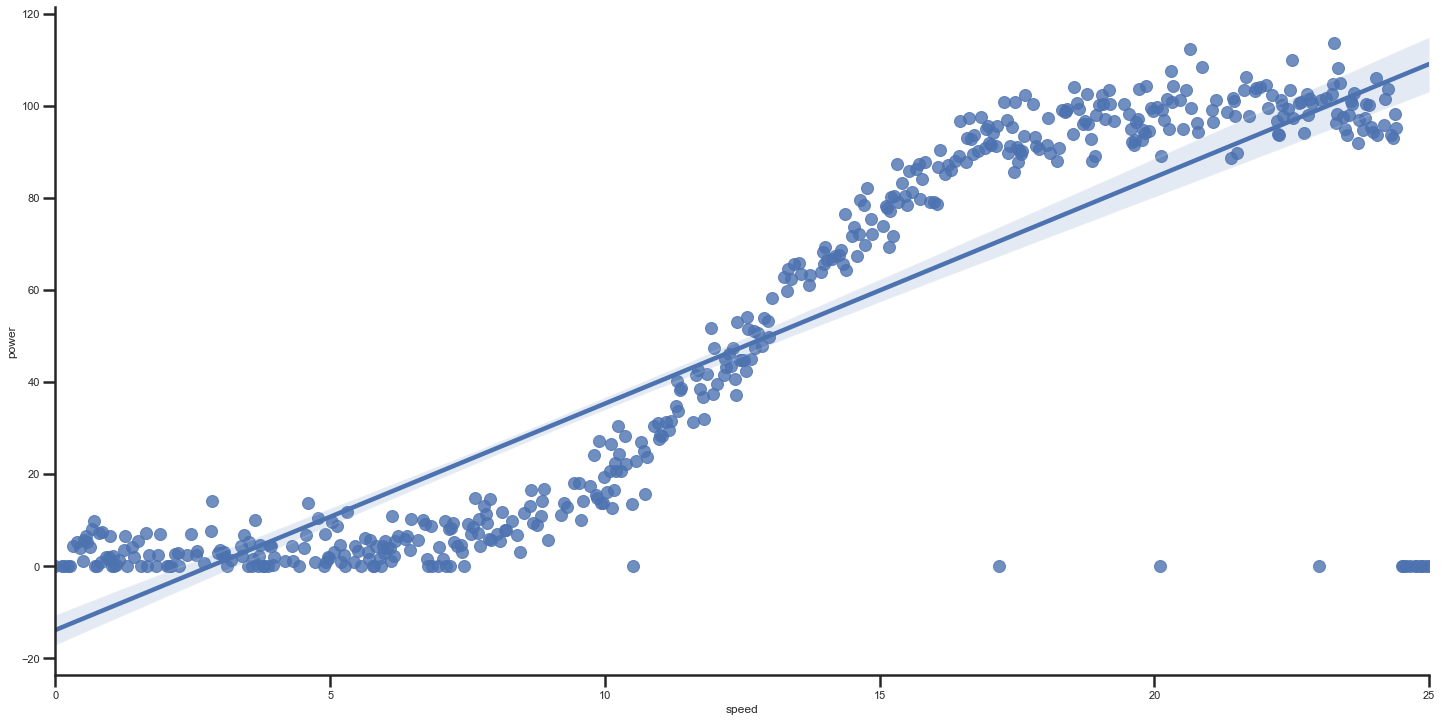

In [9]:
# Efficient Method to Generate Simple Linear Regression Model
import seaborn as sns # imports the seaborn library 
sns.lmplot(x="speed", y="power", data=powerproduction, height=10, aspect=2) 
# using sns.lmplot we input x, y and data inputs and control size of plot using height and aspect inputs.
plt.show() # shows the plot below.

Finally, a final method to demonstrate efficiency for linear regression models is using sklearn.linear_model and its built in function LinearRegression. LinearRegression fits a linear model with calculated coefficients also using the least square method. It can be done using code below:

<ipython-input-10-15fbc0a79acc>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(s[:, np.newaxis], p) # fits s and p values on new


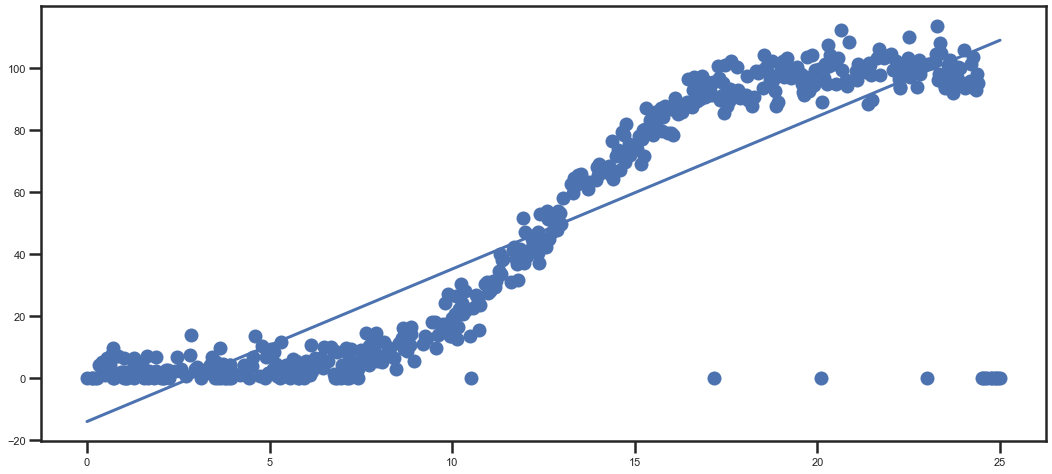

In [10]:
from sklearn.linear_model import LinearRegression # Linear Regression imported from sklearn
model = LinearRegression(fit_intercept=True) # Defines our model variable and specifies we want to fit an intercept (c)

model.fit(s[:, np.newaxis], p) # fits s and p values on new 

mfit = np.linspace(0, 25) # the slope values are organised using numpy linspace from intervals 0-20(range of dataset)
cfit = model.predict(mfit[:, np.newaxis]) 
# we use prediction model to calculate intercept for each value of m on new axis)

plt.scatter(s, p) # shows original plot as scatter
plt.plot(mfit, cfit); # fits best fit line using simple linear regression least square method
plt.show() # shows plot

We can see that again the regression model is as per our original and seaborn lmplot model (albeit not as tidy as seaborn model). Using Sklearn also required us to use 7 lines of code as opposed to 3 in seaborn. However, from a statistics perspective sklearn may be more useful, for example the $m$ and $c$ coeffs. can be quickly established using code below. 

In [11]:
print("Model slope m is:    ", model.coef_[0]) # prints model slope at position 1(0)
print("Model intercept c is:", model.intercept_) # prints model intercept at position 1(0)

Model slope m is:     4.917595665404669
Model intercept c is: -13.89990263051962


<br>

# 5. Simple Linear Regression - Analysis

Following application of our simple regression model in section 4, in this section of the notebook we are going to analyse the accuracy of our linear model by determining the R-Squared Value. 

**What is the R-Squared Value?** 

The R-squared value is a measure of how well the best fit line fits in a linear regression model. It measures the strenght in relationship between our model (power) and its dependent variable (wind speed) on a scale from 0-100%. R-Squared values are important in data analytics as after fitting a model we need to determine how well it fits the data. 

The formula for the R squared model is as follows:

* $R^{2} = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $

where;

* $R^{2}$ = r-squared
* $y_i$ = y value, in our case represented by p (power)
* $m$ = slope of the line value
* $x_i$ = x value, in our case represented by s (speed)
* $\bar{y}$ = y value mean (p average)

Lets calculate our r-squared value using the formula above in the code below.

In [12]:
# The R-squared value for our data set applying formula above to our previously created variables:
rsq = 1.0 - (np.sum((p - m * s - c)**2)/np.sum((p - p_avg)**2))

print("The R-squared value is %6.4f" % rsq) # prints our r-squared value below to 4 decimal places

The R-squared value is 0.7289


We can see after applying our formula above we get an r-squared value of 0.7289 (72.89%). Before we analyse this, it is worth noting that this process can also be done by using the build in function in Numpy, corrcoefs, see below example which achieves the same output in a more efficient process.

In [13]:
# The same value using numpy.
np_rsq = np.corrcoef(s, p)[0][1]**2 # calculates the relationship (r-squared) between s and p
print("The Numpy R-squared value is %6.4f" % np_rsq) # prints our r-squared value below to 4 decimal places

The Numpy R-squared value is 0.7289


**The Accuracy of our R-Squared Value**

From our research on r-squared values, we know the scale is between 0-100%, how do we determine if 72.89% is a good value for our dataset? The r-squared value is dependent on the area of research and it will change from each field. For example in a physical process with excellent measurements, we might expect values greater than 90%. In the field of wind energy as noted earlier in this notebook there are a number of variables that affect the output of a wind turbine such as:

* wind speed (main factor)
* the swept area of the blades
* air density
* minimum wind speed
* optimum wind speed
* maximum wind speed

Given the number of variables and the fluctuations in our scatter plots, initially the r-squared value appears to be of reasonable accuracy for this data set. However, as stated above the r-squared value is specific to the field of research, therefore one of the best methods to determine accuracy is by benchmarking to previous research. In a study carried out by Ponnusamy et. al. (2014), wind energy output was measured at three weather stations and the calculated R-Values based on the Least Square linear regression method in this study is quite comparable to those calculated in this notebook as shown in table below.

![alt text.](R_Squared_Benchmarks.png "BenchmarkRSquares")
*R-Squared Benchmarks - source: Ponnusamy et. al. (2014)*

If we plotted some of the other factors that affected the wind turbine performance we could go into further detail on the explanation of our r-squared value, however this data is not available and beyond the scope of this notebook and therefore we are satisfied with our r-squared value based on the criteria above.

**The use of Simple Linear Regression on our Dataset**

Now that we are satisfied with our linear model accuracy, is a simple linear regression model the most appropriate model for wind energy data based on wind speed? We can tell from our output plot that perhaps it is not. The simple linear regression model implies that as the wind speed increases so does the power output. The latter may be true for a certain portion of the plot, however, as can be seen from the scatter plot and from our analysis in wind energy engineering, once the wind speed hits a certain value the output will stop completely. In our case this happens around 25km/h, however on our linear regression model it implies we should be getting our highest output, and further increases in wind speed should also see an increase in performance. Therefore simple linear regression does not capture this real world scenario that great and another form of regression may be more suitable, which we will review in the next section.

<br>

# 6. Polynomial Regression

Polynomial Regression is a method of linear regression where the relationship between the independent vairable x (speed) and dependent variable y (power) is modelled as an nth degree polynomial. Polynomial regression fits a **non linear** model to the data. An example of a typical polynomial regression formula could be:

$ y = β_{0} + β_{1}x^2 + β_{2}x^3 + ... β_{n}x^n + ∈  $

where $ε$ is an unobserved random error with mean zero conditioned on a scalar variable $x$. In this model, for each unit increase in the value of $x$, the conditional expectation of $y$ increases by $β1$ units (Source: Wikepedia). 

To apply polynomial regression to our dataset we will use modules from the sklearn library which will be explained in the following code and markdown cells.

We first set up our x values and y values (s and p) for the model.

In [14]:
# Importing the dataset
dataset = powerproduction # we re-label our powerproduction set as dataset
X = dataset.iloc[0:499, 0:1].values # slices the X field to take all rows in first column
y = dataset.iloc[0:499, 1:2].values # slices the y field to take all rows in second column

Now we set up our data for machine learning by creating a test set and training set using train_test_split from sklearn. The data is split into two parts, test_size=0.2 is the ratio of the measurement to be put into the test set (20%). 80% of the measurements will then automatically go into the training set. This would be a good practice ratio for good accuracy. We use a a random state of 0, this is our seed and ensures we maintain the same results each time we run the code.

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split # we import to train_test_split to split our data for machine learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Having created our test data we are now ready to build the polynomial regression model. For comparison purposes we will also create a simple linear model so that we can compare predictive machine learning outputs further in the section. 

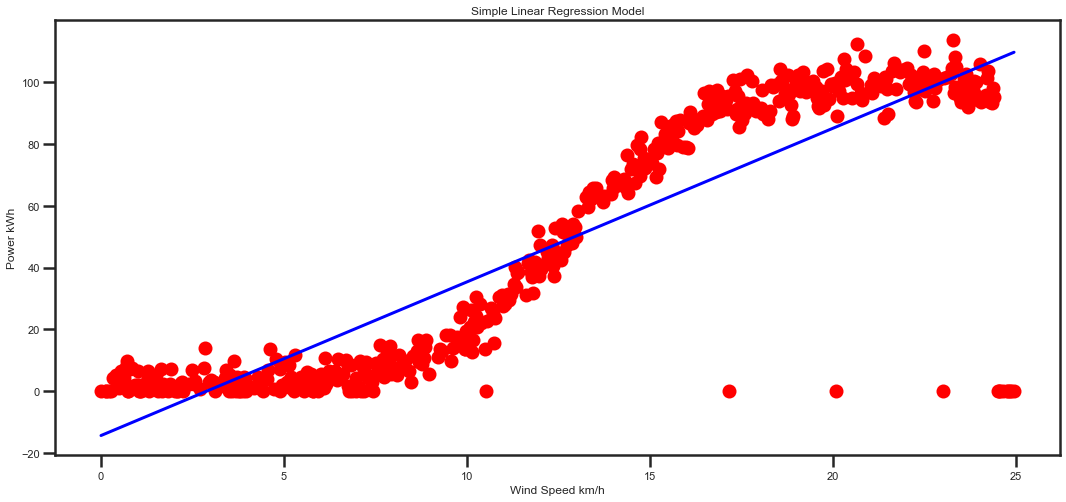

In [16]:
# Create the comparison Linear Model
from sklearn.linear_model import LinearRegression # imports the required function from sklearn
lin_reg = LinearRegression() # defines lin_reg variable 
lin_reg.fit(X, y) # we are telling lin_reg to fit a linear model on X, y of our data set

# Below we will create the parameters for our plot viz_linear
def viz_linear():
    plt.scatter(X, y, color='red') # plots original scatter color red
    plt.plot(X, lin_reg.predict(X), color='blue') # linear model line color
    plt.title('Simple Linear Regression Model')# # Sets plot title
    plt.xlabel('Wind Speed km/h') # Sets x label 
    plt.ylabel('Power kWh') # Sets y label
    plt.show() # shows the plot
    return # returns all above to the viz_linear function
viz_linear() # shows the plot below

Having created our comparison simple linear model above using sklearn LinearRegression, we can now create our polynomial regression model. To create the polynomial model we will use the PolynomialFeatures function build into sklearn.preprocessing. Using Polynomial features, sklearn will automatically apply the polynomial equation to our data set given the degree of the polynomial. As defined by Wikepedia, "In mathematics, the degree of a polynomial is the highest of the degrees of the polynomial's monomials (individual terms) with non-zero coefficients". Following trial and error a degree polynomial of four was a good fit to our data set. The code for the polynomial regression model is as below:

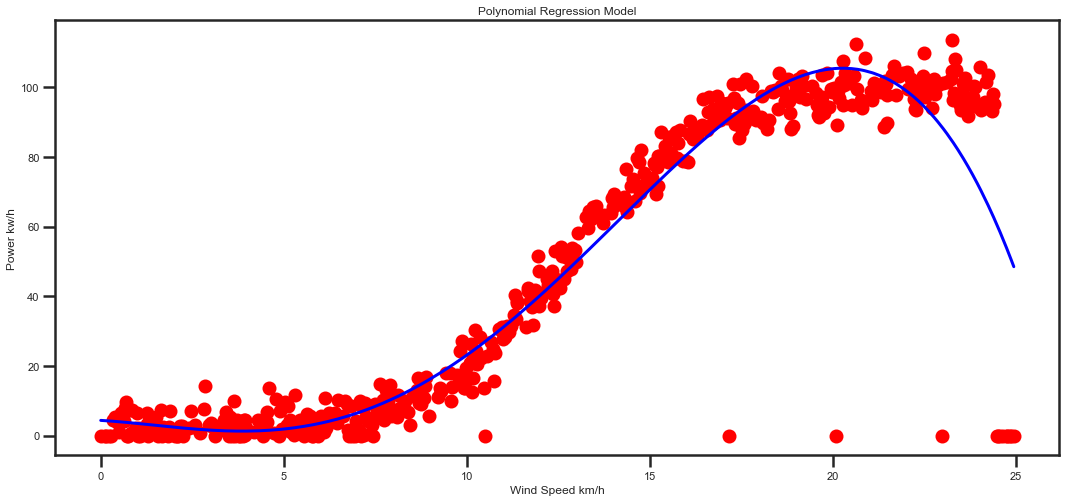

In [17]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures # imports polynomial features from skleanr
poly_reg = PolynomialFeatures(degree=4) # creates variable poly_reg which is a polynomial model with a degree of 4
X_poly = poly_reg.fit_transform(X) # Fits polynomial model to data then transforms it
pol_reg = LinearRegression() # creates variable for linear regression
pol_reg.fit(X_poly, y) # applies linear regression the X_poly variable created and our y (power) 

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red') # plots original scatter color red
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    # plots the polynomial regression model in blue
    plt.title('Polynomial Regression Model') # Sets plot title
    plt.xlabel('Wind Speed km/h') # Sets x label 
    plt.ylabel('Power kw/h') # Sets y label 
    plt.show() # shows the plot
    return # returns all above to the viz_polynomial function
viz_polymonial() # shows the plot below

We can see from our plot above that the polynomial regression model is a much better fit than a simple regression model. Particularly at the higher end of the scale the polynomial accurately captures the drop in output once the wind speed goes above a certain threshold. To carry out further comparison lets carry some machine learning predictions based on our previously created test and train data for both the linear and regression models.

In [18]:
# Predicting a new result with Linear Regression
lin1 = lin_reg.predict([[10]]) # predicts the y value for given x values on simple linear model
lin2 = lin_reg.predict([[17]])
lin3 = lin_reg.predict([[25]])
lin4 = lin_reg.predict([[30]])

# Predicting a new result with Polymonial Regression
poly1 = pol_reg.predict(poly_reg.fit_transform([[10]])) # predicts the y value for given x values on polynomial model
poly2 = pol_reg.predict(poly_reg.fit_transform([[17]]))
poly3 = pol_reg.predict(poly_reg.fit_transform([[25]]))
poly4 = pol_reg.predict(poly_reg.fit_transform([[30]]))

print('linear 10 is:', lin1)
print('poly 10 is:', poly1)
print('linear 17 is:', lin2)
print('poly 17 is:', poly2)
print('linear 25 is:', lin3)
print('poly 25 is:', poly3)
print('linear 30 is:', lin4)
print('poly 30 is:', poly4)

linear 10 is: [[35.36023416]]
poly 10 is: [[23.08057227]]
linear 17 is: [[70.14993957]]
poly 17 is: [[89.57158486]]
linear 25 is: [[109.90960289]]
poly 25 is: [[47.08449764]]
linear 30 is: [[134.75939246]]
poly 30 is: [[-226.16141996]]


As can be seen from the results, there is a considerable difference between the more accurate polynomial and the simple linear model at the higher end of the wind speeds:

**Wind Speed of 10 km/h**
* linear 10 is: [[35.36023416]]
* poly 10 is: [[23.08057227]]  
Not a considerable difference at lower end of scale.

**Wind Speed of 17 km/h**
* linear 17 is: [[70.14993957]]
* poly 17 is: [[89.57158486]]  
Also quite close results for the median range as the original linear model simple linear relationship was a good fit to this range of results.

**Wind Speed of 25 km/h**
* linear 25 is: [[109.90960289]]
* poly 25 is: [[47.08449764]]  
Here is where there is a significant difference in accuracy in the models. The poly is far more correct correctly capturing the drop off in output at high wind speeds, while the simple linear suggests we should keep increasing in power which is not reflective of real world wind engineering.

**Wind Speed of 30 km/h**
* linear 30 is: [[134.75939246]]
* poly 30 is: [[-226.16141996]]  
Finally, we can see at an even increased wind speed beyond original plot range, the poly is -226 (effectively 0 as we cannot lose power!) and linear suggests that we should have increased power further which is incorrect as the turbine would have cut out for safety reasons. 


<br>

# 7. Conclusion

This notebook has carried out the requirements of the project brief. Using a real world phenomenon of wind energy vs wind speed. We firstly carried out some statistical analysis and visualisation of our provided data set. Then following on from this we applied a simple linear regression model using the least square method to the data and provided various methods of producing the model. 

Following analysis on accuracy of our least square model and benchmarking to real world research we then went on to determine if this was the most appropriate model for the data set. Our analysis found that in this case simple linear regression was not the most appropriate and a polynomial model with a degree of four was a much better fit. The latter was demonstrated by carrying out predictions on the simple linear and polynomial models created using scikit-learn machine learning tools. Our main discrepancy in the simple linear model was that it would continue to produce higher output wind power results as the wind speed increased. However, as we know from our original data provided and real world research this is not the case and what should happen is the wind power output should drop off once we go above our high threshold, which in our case was around 25 km/h. This was much more accurately portrayed in the polynomial model. 

While carrying out this notebook, the author learned a significant amount on regression modelling using python, but also other learnings in the field of wind energy and writing math formulas in jupyter notebook. 

Finally, it was a goal for the author that someone else could open this notebook and clearly follow the methodology carried out to complete the research, with clear explanations of the code used and markdown cells to provide further descriptive analysis. This is also believed to be fulfilled in this notebook.

# 8. References

1. Ponnusamy, Ramalingam & Venkatesan, R & Sing, A. (2014). Wind energy location prediction between meteorological stations using ANN. 1135-1144. 
2.Hydroquebec.com. 2021. Wind Turbines | How They Work | Hydro-QueBec. [online] Available at: <http://www.hydroquebec.com/learning/eolienne/#:~:text=Wind%20turbines%20require%3A,be%20stopped%20to%20avoid%20damage> [Accessed 7 January 2021].
3. Seaborn.pydata.org. 2021. Visualizing Distributions Of Data — Seaborn 0.11.1 Documentation. [online] Available at: <https://seaborn.pydata.org/tutorial/distributions.html> [Accessed 7 January 2021].
4. Codecademy. 2021. Seaborn Styling, Part 1: Figure Style And Scale | Codecademy. [online] Available at: <https://www.codecademy.com/articles/seaborn-design-i#:~:text=Seaborn%20has%20five%20built%2Din,name%20of%20it%20to%20sns.> [Accessed 7 January 2021].
5. Medium. 2021. Layman’S Introduction To Linear Regression. [online] Available at: <https://towardsdatascience.com/laymans-introduction-to-linear-regression-8b334a3dab09#:~:text=Linear%20regression%20attempts%20to%20model,variable%20(e.g.%20your%20expenses).> [Accessed 7 January 2021].
6. Mathcentre.ac.uk. 2021. Equations Of Straight Lines. [online] Available at: <https://www.mathcentre.ac.uk/resources/uploaded/mc-ty-strtlines-2009-1.pdf> [Accessed 7 January 2021].
7. Varsitytutors.com. 2021. Line Of Best Fit (Least Square Method). [online] Available at: <https://www.varsitytutors.com/hotmath/hotmath_help/topics/line-of-best-fit#:~:text=Step%201%3A%20Calculate%20the%20mean,mean%20of%20the%20y%20%2Dvalues.&text=Step%204%3A%20Use%20the%20slope,best%20fit%20for%20the%20data.> [Accessed 7 January 2021].
8. Medium. 2021. Mathematics For Machine Learning : Linear Regression & Least Square Regression. [online] Available at: <https://towardsdatascience.com/mathematics-for-machine-learning-linear-regression-least-square-regression-de09cf53757c> [Accessed 7 January 2021].
9. Numpy.org. 2021. Numpy Polyfit. [online] Available at: <https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html https://rstudio-pubs-> [Accessed 7 January 2021].
10. Github. 2021. Writing Mathematic Fomulas In Markdown. [online] Available at: <https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/> [Accessed 7 January 2021].
11. Scikit-learn.org. 2021. 1.1. Linear Models — Scikit-Learn 0.24.0 Documentation. [online] Available at: <https://scikit-learn.org/stable/modules/linear_model.html> [Accessed 7 January 2021].
12. Seaborn.pydata.org. 2021. Seaborn.Lmplot — Seaborn 0.11.1 Documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.lmplot.html> [Accessed 7 January 2021].
13. Numpy.org. 2021. Numpy.Corrcoef — Numpy V1.19 Manual. [online] Available at: <https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html> [Accessed 7 January 2021].
14. Frost, J., 2021. How To Interpret R-Squared In Regression Analysis - Statistics By Jim. [online] Statistics By Jim. Available at: <https://statisticsbyjim.com/regression/interpret-r-squared-regression/#:~:text=R%2Dsquared%20is%20a%20goodness,the%20independent%20variables%20explain%20collectively.&text=For%20instance%2C%20small%20R%2Dsquared,values%20are%20not%20necessarily%20good!> [Accessed 7 January 2021].
15. Frost, J., 2021. How High Does R-Squared Need To Be? - Statistics By Jim. [online] Statistics By Jim. Available at: <https://statisticsbyjim.com/regression/how-high-r-squared/#:~:text=R%2Dsquared%20should%20accurately%20reflect,or%20lower%20than%20this%20value.&text=However%2C%20if%20you%20analyze%20a,%2Dsquared%20values%20over%2090%25.> [Accessed 7 January 2021].
16. Medium. 2021. Understanding And Calculating The Cost Function For Linear Regression. [online] Available at: <https://medium.com/@lachlanmiller_52885/understanding-and-calculating-the-cost-function-for-linear-regression-39b8a3519fcb> [Accessed 7 January 2021].
17. Medium. 2021. Mathematics For Machine Learning : Linear Regression & Least Square Regression. [online] Available at: <https://towardsdatascience.com/mathematics-for-machine-learning-linear-regression-least-square-regression-de09cf53757c> [Accessed 7 January 2021].
18. Medium. 2021. Layman’S Introduction To Linear Regression. [online] Available at: <https://towardsdatascience.com/laymans-introduction-to-linear-regression-8b334a3dab09#:~:text=Linear%20regression%20attempts%20to%20model,variable%20(e.g.%20your%20expenses).> [Accessed 7 January 2021].
19. Medium. 2021. Introduction To Linear Regression In Python. [online] Available at: <https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0> [Accessed 7 January 2021].
20. Pandas.pydata.org. 2021. Pandas.Dataframe.Iloc — Pandas 1.2.0 Documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html> [Accessed 7 January 2021].
21. Scikit-learn.org. 2021. Sklearn.Preprocessing.Polynomialfeatures — Scikit-Learn 0.24.0 Documentation. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html> [Accessed 7 January 2021].
22. GeeksforGeeks. 2021. Python | Implementation Of Polynomial Regression - Geeksforgeeks. [online] Available at: <https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/> [Accessed 7 January 2021].
23. En.wikipedia.org. 2021. Degree Of A Polynomial. [online] Available at: <https://en.wikipedia.org/wiki/Degree_of_a_polynomial#:~:text=In%20mathematics%2C%20the%20degree%20of,is%20a%20non%2Dnegative%20integer.> [Accessed 7 January 2021].
24. En.wikipedia.org. 2021. Quartic Function. [online] Available at: <https://en.wikipedia.org/wiki/Quartic_function> [Accessed 7 January 2021].
25. Medium. 2021. Machine Learning: Polynomial Regression With Python. [online] Available at: <https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386> [Accessed 7 January 2021].
26. En.wikipedia.org. 2021. Polynomial Regression. [online] Available at: <https://en.wikipedia.org/wiki/Polynomial_regression#:~:text=In%20statistics%2C%20polynomial%20regression%20is,nth%20degree%20polynomial%20in%20x.&text=Such%20variables%20are%20also%20used%20in%20classification%20settings.> [Accessed 7 January 2021].
27. Python, R., 2021. Linear Regression In Python – Real Python. [online] Realpython.com. Available at: <https://realpython.com/linear-regression-in-python/> [Accessed 7 January 2021].
28. Medium. 2021. 5 Types Of Regression And Their Properties. [online] Available at: <https://towardsdatascience.com/5-types-of-regression-and-their-properties-c5e1fa12d55e> [Accessed 7 January 2021].
29. VanderPlas, J., 2021. In Depth: Linear Regression | Python Data Science Handbook. [online] Jakevdp.github.io. Available at: <https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html> [Accessed 7 January 2021].
30. GitHub. 2021. Ianmcloughlin/Jupyter-Teaching-Notebooks. [online] Available at: Mcloughlin, Ian., 2021. <https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/fitting-lines.ipynb> [Accessed 7 January 2021].
31.  GitHub. 2021. Ianmcloughlin/Jupyter-Teaching-Notebooks. [online] Available at: Mcloughlin, Ian., 2021. <https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/regression.ipynb> [Accessed 7 January 2021].

***
# End.